PCA verideki gerekli bilgileri ortaya çıkarmada oldukça etkili bir yöntemdir. PCA’in arkasında yatan temel mantık çok boyutlu bir veriyi, verideki temel özellikleri yakalayarak daha az sayıda değişkenle göstermektir.

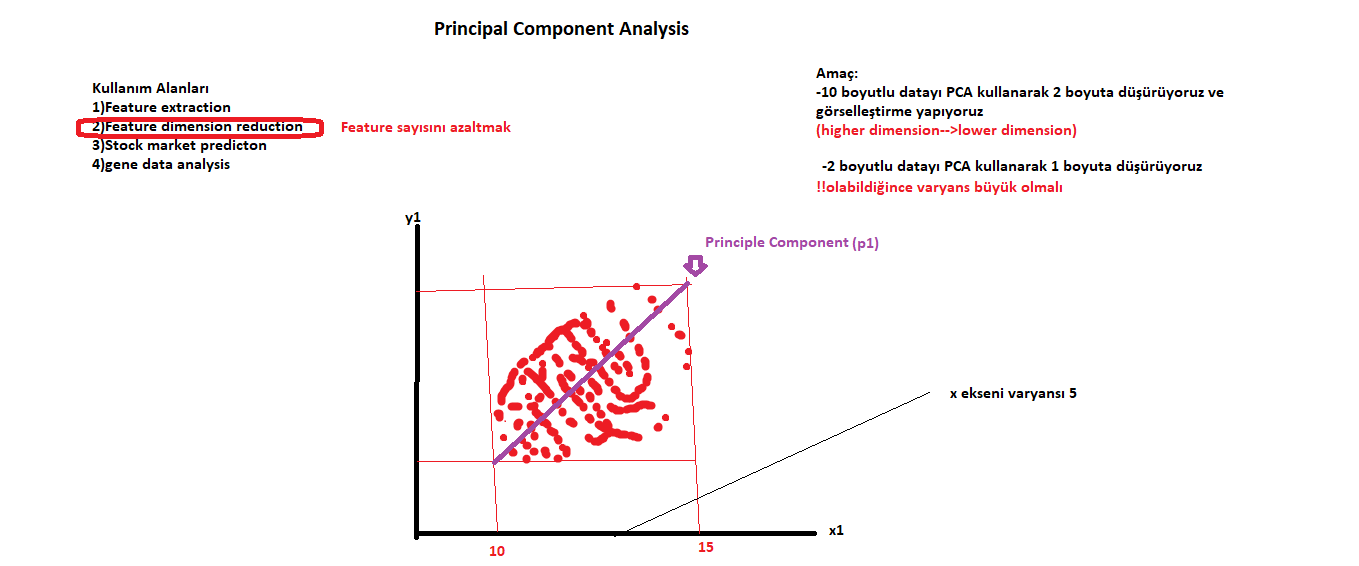

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris

In [13]:
iris=load_iris()
df=iris.data
feature_names=iris.feature_names
y=iris.target


In [19]:
df=pd.DataFrame(df,columns=feature_names)
df["sinif"]=y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sinif
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [24]:
X=df.drop(["sinif"],axis=1).values

In [32]:
from sklearn.decomposition import PCA
model=PCA(n_components=2,whiten=True) #whiten normalize yapıyor
model.fit(X)
x_pca=model.transform(X) #X in boyutu 4 ten 2 ye dönüştür
x_pca# biri prpinciple component (p1) diğeri second component p2()

array([[-1.30533786,  0.64836932],
       [-1.31993521, -0.35930856],
       [-1.40496732, -0.29424412],
       [-1.33510889, -0.64613986],
       [-1.32702321,  0.6633044 ],
       [-1.10922246,  1.50488434],
       [-1.3716775 , -0.18160462],
       [-1.27714084,  0.33166784],
       [-1.40369908, -1.17396001],
       [-1.29980851, -0.23095919],
       [-1.2191728 ,  1.30947554],
       [-1.27062918,  0.02990145],
       [-1.35493432, -0.47727214],
       [-1.5677929 , -1.03811965],
       [-1.28618899,  2.39286603],
       [-1.16037307,  2.71623681],
       [-1.2758681 ,  1.64566141],
       [-1.28791362,  0.63304684],
       [-1.06981161,  1.77184386],
       [-1.25858365,  1.04251602],
       [-1.12351854,  0.79442356],
       [-1.23704894,  0.87897239],
       [-1.56396833,  0.27093722],
       [-1.11985996,  0.20037678],
       [-1.14564495, -0.07568135],
       [-1.21903752, -0.29641102],
       [-1.20063096,  0.26582861],
       [-1.24610158,  0.74646111],
       [-1.28365251,

In [34]:
print(f"variance ratio:  {model.explained_variance_ratio_}") #yüzde 92 lik kısım p1 yüzde 5 p2

variance ratio:  [0.92461872 0.05306648]


In [36]:
print(sum(model.explained_variance_ratio_)) #neredeyse yüzde 98 datama sahibim, yüzde 2 lik veri kaybı yaşadık

0.977685206318795


## GÖRSELLEŞTİRME

In [38]:
df["p1"]=x_pca[:,0]
df["p2"]=x_pca[:,1]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sinif,p1,p2
0,5.1,3.5,1.4,0.2,0,-1.305338,0.648369
1,4.9,3.0,1.4,0.2,0,-1.319935,-0.359309
2,4.7,3.2,1.3,0.2,0,-1.404967,-0.294244
3,4.6,3.1,1.5,0.2,0,-1.335109,-0.646140
4,5.0,3.6,1.4,0.2,0,-1.327023,0.663304


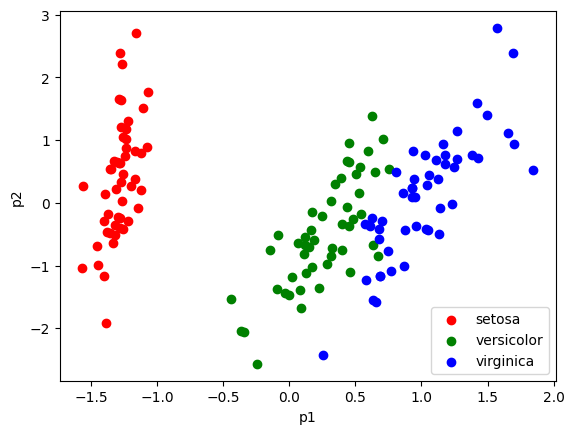

In [42]:
color=["red","green","blue"]
for i in range(3):
  plt.scatter(df["p1"][df["sinif"]==i],df["p2"][df["sinif"]==i],color=color[i],label=iris["target_names"][i])

plt.legend()
plt.xlabel("p1")
plt.ylabel("p2")
plt.show()